# Feature Selection

In [1]:
# Libraries to install
# %pip install pandas-profiling

from datetime import timedelta
import datetime as dt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit
%matplotlib inline

In [2]:
%time
modeling_data = pd.read_csv('modeling_data.csv')

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


### Prep the Data

Dropping unneeded column - happened when uploading the data.

In [3]:
modeling_data.drop(['Unnamed: 0'], axis=1, inplace=True)

In [4]:
modeling_data.head()

,Recnum,Cardnum,Date,Merchnum,Merch description,Merch state,Merch zip,Transtype,Amount,Fraud,...,card_merchnum_state_count_0_by_30,card_merchnum_state_count_1_by_7,card_merchnum_state_count_1_by_14,card_merchnum_state_count_1_by_30,card_merchnum_state_count_3_by_7,card_merchnum_state_count_3_by_14,card_merchnum_state_count_3_by_30,weekday,weekday_risk,state_risk
0,14567,5142268678,2010-03-01,9108234610006,STAPLES #941,PA,17201.0,P,27.88,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0,0.010011,0.023085
1,14568,5142177486,2010-03-01,2200000000570,OFFICE MAX 00000570,IL,60015.0,P,61.37,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0,0.010011,0.003038
2,14569,5142153646,2010-03-01,8803300877307,METRO CAMERA CENTER I,VA,22202.0,P,40.00,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0,0.010011,0.017979
3,14570,5142188649,2010-03-01,4503084800400,MEIJER INC #123 S1W,MI,48195.0,P,51.69,0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0,0.010011,0.010870
4,14571,5142271065,2010-03-01,15907708335,HOLIDAY INNS,MD,20746.0,P,109.98,0,...,0.005556,0.142857,0.011905,0.005556,0.142857,0.011905,0.005556,0,0.010011,0.026884


In [5]:
modeling_data.columns

Index(['Recnum', 'Cardnum', 'Date', 'Merchnum', 'Merch description',
       'Merch state', 'Merch zip', 'Transtype', 'Amount', 'Fraud',
       ...
       'card_merchnum_state_count_0_by_30', 'card_merchnum_state_count_1_by_7',
       'card_merchnum_state_count_1_by_14',
       'card_merchnum_state_count_1_by_30', 'card_merchnum_state_count_3_by_7',
       'card_merchnum_state_count_3_by_14',
       'card_merchnum_state_count_3_by_30', 'weekday', 'weekday_risk',
       'state_risk'],
      dtype='object', length=751)

Only want the Cardnum, Merchnum, Fraud label + candidate created variables. So, drop all other fields.

In [6]:
mydata = modeling_data.drop(['Recnum','Date','Merch description', 'Merch state', 'Merch zip', 'Transtype', 'Amount'], axis=1)


In [7]:
mydata.head()

,Cardnum,Merchnum,Fraud,card_merchnum,card_merchdesc,card_state,card_zip,merchnum_state,merchnum_zip,card_merchnum_zip,...,card_merchnum_state_count_0_by_30,card_merchnum_state_count_1_by_7,card_merchnum_state_count_1_by_14,card_merchnum_state_count_1_by_30,card_merchnum_state_count_3_by_7,card_merchnum_state_count_3_by_14,card_merchnum_state_count_3_by_30,weekday,weekday_risk,state_risk
0,5142268678,9108234610006,0,51422686789108234610006,5142268678STAPLES #941,5142268678PA,514226867817201.0,9108234610006PA,910823461000617201.0,5142268678910823461000617201.0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0,0.010011,0.023085
1,5142177486,2200000000570,0,51421774862200000000570,5142177486OFFICE MAX 00000570,5142177486IL,514217748660015.0,2200000000570IL,220000000057060015.0,5142177486220000000057060015.0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0,0.010011,0.003038
2,5142153646,8803300877307,0,51421536468803300877307,5142153646METRO CAMERA CENTER I,5142153646VA,514215364622202.0,8803300877307VA,880330087730722202.0,5142153646880330087730722202.0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0,0.010011,0.017979
3,5142188649,4503084800400,0,51421886494503084800400,5142188649MEIJER INC #123 S1W,5142188649MI,514218864948195.0,4503084800400MI,450308480040048195.0,5142188649450308480040048195.0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0,0.010011,0.010870
4,5142271065,15907708335,0,514227106515907708335,5142271065HOLIDAY INNS,5142271065MD,514227106520746.0,15907708335MD,1590770833520746.0,51422710651590770833520746.0,...,0.005556,0.142857,0.011905,0.005556,0.142857,0.011905,0.005556,0,0.010011,0.026884


Creating a random variable - should have a non-significant result in the filtering. Will be used to ensure the filtering process is proceeding correctly.

In [8]:
mydata['Random'] = np.random.randint(0,100000, size=len(mydata))

In [9]:
mydata.dtypes

Cardnum                                int64
Merchnum                              object
Fraud                                  int64
card_merchnum                         object
card_merchdesc                        object
                                      ...   
card_merchnum_state_count_3_by_30    float64
weekday                                int64
weekday_risk                         float64
state_risk                           float64
Random                                 int64
Length: 745, dtype: object

Here I am dropping the 'weekday' variable. I created this when making my target encoded variables, but we no longer need this - it serves no purpose.

In [10]:
mydata.drop(['weekday'], axis=1, inplace=True)

In [11]:
mydata.dtypes

Cardnum                                int64
Merchnum                              object
Fraud                                  int64
card_merchnum                         object
card_merchdesc                        object
                                      ...   
card_merchnum_state_count_3_by_14    float64
card_merchnum_state_count_3_by_30    float64
weekday_risk                         float64
state_risk                           float64
Random                                 int64
Length: 744, dtype: object

Removing the initial entities I used to loop over to create the variables. 

In [12]:
entities = ['Cardnum', 'Merchnum', 'card_merchnum', 'card_merchdesc', 'card_state', 'card_zip', 'merchnum_state', 'merchnum_zip', 'card_merchnum_zip', 'card_merchnum_state']

In [13]:
mydata.drop(entities, axis=1, inplace=True)

This data set now has, the Fraud label, and my 733 created variables (one of which is a random variable that should have no significance. 

In [14]:
mydata

,Fraud,Cardnum_day_since,Merchnum_day_since,card_merchnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,...,card_merchnum_state_count_0_by_30,card_merchnum_state_count_1_by_7,card_merchnum_state_count_1_by_14,card_merchnum_state_count_1_by_30,card_merchnum_state_count_3_by_7,card_merchnum_state_count_3_by_14,card_merchnum_state_count_3_by_30,weekday_risk,state_risk,Random
0,0,1.0,1.0,365.0,1,27.880000,27.88,27.88,27.88,1.000000,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.010011,0.023085,76191
1,0,1.0,34.0,365.0,1,61.370000,61.37,61.37,61.37,1.000000,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.010011,0.003038,68694
2,0,1.0,365.0,365.0,1,40.000000,40.00,40.00,40.00,1.000000,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.010011,0.017979,81591
3,0,1.0,365.0,365.0,1,51.690000,51.69,51.69,51.69,1.000000,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.010011,0.010870,55980
4,0,13.0,4.0,13.0,1,109.980000,109.98,109.98,109.98,1.000000,...,0.005556,0.142857,0.011905,0.005556,0.142857,0.011905,0.005556,0.010011,0.026884,48257
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54494,0,0.0,0.0,0.0,2,290.000000,340.00,290.00,580.00,1.172414,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.007721,0.002613,32482
54495,0,0.0,0.0,365.0,2,116.500000,133.00,116.50,233.00,1.141631,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.007721,0.002305,14889
54496,0,0.0,101.0,365.0,3,515.753333,759.50,617.76,1547.26,0.329615,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.007721,0.003038,39619
54497,0,0.0,0.0,0.0,2,65.450000,100.96,65.45,130.90,1.542552,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.007721,0.017979,89279


### Filtering

In [15]:
mydata.columns

Index(['Fraud', 'Cardnum_day_since', 'Merchnum_day_since',
       'card_merchnum_day_since', 'Cardnum_count_0', 'Cardnum_avg_0',
       'Cardnum_max_0', 'Cardnum_med_0', 'Cardnum_total_0',
       'Cardnum_actual/avg_0',
       ...
       'card_merchnum_state_count_0_by_30', 'card_merchnum_state_count_1_by_7',
       'card_merchnum_state_count_1_by_14',
       'card_merchnum_state_count_1_by_30', 'card_merchnum_state_count_3_by_7',
       'card_merchnum_state_count_3_by_14',
       'card_merchnum_state_count_3_by_30', 'weekday_risk', 'state_risk',
       'Random'],
      dtype='object', length=734)

In [16]:
mydata.dtypes

Fraud                                  int64
Cardnum_day_since                    float64
Merchnum_day_since                   float64
card_merchnum_day_since              float64
Cardnum_count_0                        int64
                                      ...   
card_merchnum_state_count_3_by_14    float64
card_merchnum_state_count_3_by_30    float64
weekday_risk                         float64
state_risk                           float64
Random                                 int64
Length: 734, dtype: object

Create two datasets of good and bad records.

In [17]:
goods = mydata[mydata['Fraud'] == 0]
bads = mydata[mydata['Fraud'] == 1]

In [18]:
goods.head()

,Fraud,Cardnum_day_since,Merchnum_day_since,card_merchnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,...,card_merchnum_state_count_0_by_30,card_merchnum_state_count_1_by_7,card_merchnum_state_count_1_by_14,card_merchnum_state_count_1_by_30,card_merchnum_state_count_3_by_7,card_merchnum_state_count_3_by_14,card_merchnum_state_count_3_by_30,weekday_risk,state_risk,Random
0,0,1.0,1.0,365.0,1,27.88,27.88,27.88,27.88,1.0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.010011,0.023085,76191
1,0,1.0,34.0,365.0,1,61.37,61.37,61.37,61.37,1.0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.010011,0.003038,68694
2,0,1.0,365.0,365.0,1,40.00,40.00,40.00,40.00,1.0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.010011,0.017979,81591
3,0,1.0,365.0,365.0,1,51.69,51.69,51.69,51.69,1.0,...,0.033333,0.142857,0.071429,0.033333,0.142857,0.071429,0.033333,0.010011,0.010870,55980
4,0,13.0,4.0,13.0,1,109.98,109.98,109.98,109.98,1.0,...,0.005556,0.142857,0.011905,0.005556,0.142857,0.011905,0.005556,0.010011,0.026884,48257


In [19]:
bads.head()

,Fraud,Cardnum_day_since,Merchnum_day_since,card_merchnum_day_since,Cardnum_count_0,Cardnum_avg_0,Cardnum_max_0,Cardnum_med_0,Cardnum_total_0,Cardnum_actual/avg_0,...,card_merchnum_state_count_0_by_30,card_merchnum_state_count_1_by_7,card_merchnum_state_count_1_by_14,card_merchnum_state_count_1_by_30,card_merchnum_state_count_3_by_7,card_merchnum_state_count_3_by_14,card_merchnum_state_count_3_by_30,weekday_risk,state_risk,Random
433,1,3.0,3.0,3.0,1,314.50,314.50,314.50,314.50,1.0,...,0.002083,0.035714,0.008929,0.002083,0.071429,0.017857,0.004167,0.007721,0.006852,15368
834,1,1.0,1.0,1.0,1,261.20,261.20,261.20,261.20,1.0,...,0.002083,0.057143,0.015873,0.004167,0.057143,0.015873,0.004167,0.012477,0.006852,39212
1870,1,4.0,4.0,4.0,1,347.94,347.94,347.94,347.94,1.0,...,0.002222,0.047619,0.008929,0.002222,0.047619,0.008929,0.002222,0.010184,0.006852,73988
2277,1,20.0,20.0,20.0,1,169.35,169.35,169.35,169.35,1.0,...,0.011111,0.142857,0.071429,0.011111,0.142857,0.071429,0.011111,0.010011,0.023085,8903
2348,1,1.0,1.0,1.0,1,855.61,855.61,855.61,855.61,1.0,...,0.002083,0.071429,0.017857,0.004167,0.071429,0.017857,0.004167,0.010011,0.006852,66386


Create dataframe to hold the ranks

In [20]:
KSFDR = pd.DataFrame(columns = ['ks', 'FDR'], index = mydata.columns)

In [21]:
KSFDR

,ks,FDR
Fraud,NaN,NaN
Cardnum_day_since,NaN,NaN
Merchnum_day_since,NaN,NaN
card_merchnum_day_since,NaN,NaN
Cardnum_count_0,NaN,NaN
...,...,...
card_merchnum_state_count_3_by_14,NaN,NaN
card_merchnum_state_count_3_by_30,NaN,NaN
weekday_risk,NaN,NaN
state_risk,NaN,NaN


Calculate univariate KS and univariate FDR@3%

In [22]:
from scipy import stats as sps

i = 0
numbads = len(bads)
for column in mydata.columns:
    KSFDR['ks'][i] = sps.ks_2samp(goods[column],bads[column])[0]    
    i = i+1
    
topRows = int(round(len(mydata)*0.03))
j = 0
for column in mydata.columns:
    temp = mydata.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'Fraud']
    needed2 = temp2.loc[:,'Fraud']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR.loc[column, 'FDR'] = FDRate
    j = j +1
            
KSFDR['rank_ks'] = KSFDR['ks'].rank(ascending = True)
KSFDR['rank_FDR'] = KSFDR['FDR'].rank(ascending = True)
KSFDR['average_rank'] = (KSFDR['rank_ks'] + KSFDR['rank_FDR']) / 2
KSFDR.sort_values(by=['average_rank'], ascending=False, inplace=True)

In [23]:
KSFDR

,ks,FDR,rank_ks,rank_FDR,average_rank
Fraud,1.0,1.0,734.0,734.0,734.00
card_zip_total_7,0.672484,0.64759,732.0,731.5,731.75
card_zip_total_3,0.668503,0.644578,729.0,730.0,729.50
card_state_total_3,0.672235,0.637048,731.0,726.0,728.50
card_merchnum_state_total_7,0.664719,0.641566,726.0,728.5,727.25
...,...,...,...,...,...
merchnum_zip_count_1_by_30,0.132389,0.010542,46.0,50.0,48.00
Merchnum_count_0_by_14,0.138628,0.009036,55.0,40.5,47.75
merchnum_state_count_1_by_30,0.131513,0.010542,45.0,50.0,47.50
merchnum_zip_count_0_by_14,0.138289,0.009036,53.0,40.5,46.75


In [38]:
KSFDR.loc['Random']

ks               0.03281
FDR             0.025602
rank_ks              1.0
rank_FDR            98.5
average_rank       49.75
Name: Random, dtype: object

In [39]:
KSFDR.to_csv("Filtering_Results.csv")

Select the top 80 ranked variables.

In [24]:
top80df = KSFDR[:81]
top80df.drop(['Fraud'], inplace=True)
top80df

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,ks,FDR,rank_ks,rank_FDR,average_rank
card_zip_total_7,0.672484,0.64759,732.0,731.5,731.75
card_zip_total_3,0.668503,0.644578,729.0,730.0,729.50
card_state_total_3,0.672235,0.637048,731.0,726.0,728.50
card_merchnum_state_total_7,0.664719,0.641566,726.0,728.5,727.25
card_merchnum_total_7,0.664682,0.641566,725.0,728.5,726.75
...,...,...,...,...,...
Merchnum_total_3,0.611539,0.414157,679.0,626.0,652.50
Merchnum_max_0,0.595226,0.457831,661.0,643.5,652.25
merchnum_zip_total_0,0.56873,0.518072,609.0,692.0,650.50
card_merchdesc_max_180,0.584326,0.468373,648.0,653.0,650.50


In [25]:
top80df.index

Index(['card_zip_total_7', 'card_zip_total_3', 'card_state_total_3',
       'card_merchnum_state_total_7', 'card_merchnum_total_7',
       'card_merchnum_state_total_3', 'card_merchnum_total_3',
       'card_merchnum_zip_total_7', 'card_state_total_7',
       'card_merchnum_zip_total_3', 'card_merchdesc_total_7',
       'card_merchdesc_total_3', 'card_merchnum_state_total_14',
       'card_zip_total_14', 'card_merchnum_total_14',
       'card_merchdesc_total_14', 'card_state_total_1',
       'card_merchnum_zip_total_14', 'card_state_total_14', 'card_zip_total_1',
       'card_merchnum_state_total_1', 'card_merchnum_total_1',
       'card_merchnum_zip_total_1', 'card_merchdesc_total_30',
       'card_zip_total_30', 'card_merchnum_state_total_30',
       'card_merchnum_total_30', 'card_merchnum_zip_total_30',
       'card_merchdesc_total_1', 'card_zip_max_14', 'card_state_max_7',
       'card_merchdesc_max_14', 'card_state_max_3', 'card_zip_max_30',
       'card_zip_max_7', 'card_state_t

In [26]:
top80_var = top80df.index

In [28]:
mydata80 = mydata[top80_var]
mydata80.head()

,card_zip_total_7,card_zip_total_3,card_state_total_3,card_merchnum_state_total_7,card_merchnum_total_7,card_merchnum_state_total_3,card_merchnum_total_3,card_merchnum_zip_total_7,card_state_total_7,card_merchnum_zip_total_3,...,merchnum_zip_total_1,card_merchnum_state_max_1,card_merchnum_zip_max_1,card_merchnum_max_1,merchnum_state_max_0,Merchnum_total_3,Merchnum_max_0,merchnum_zip_total_0,card_merchdesc_max_180,merchnum_zip_total_3
0,69.64,27.88,27.88,27.88,27.88,27.88,27.88,27.88,69.64,27.88,...,216.97,27.88,27.88,27.88,27.88,216.97,27.88,27.88,41.76,216.97
1,61.37,61.37,61.37,61.37,61.37,61.37,61.37,61.37,61.37,61.37,...,61.37,61.37,61.37,61.37,61.37,61.37,61.37,61.37,61.37,61.37
2,432.70,40.00,40.00,40.00,40.00,40.00,40.00,40.00,432.70,40.00,...,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00,40.00
3,51.69,51.69,119.66,51.69,51.69,51.69,51.69,51.69,119.66,51.69,...,51.69,51.69,51.69,51.69,51.69,51.69,51.69,51.69,51.69,51.69
4,109.98,109.98,109.98,109.98,109.98,109.98,109.98,109.98,109.98,109.98,...,109.98,109.98,109.98,109.98,109.98,109.98,109.98,109.98,1500.00,109.98


### Wrapper

In [29]:
Y = mydata['Fraud']
Y

0        0
1        0
2        0
3        0
4        0
        ..
54494    0
54495    0
54496    0
54497    0
54498    0
Name: Fraud, Length: 54499, dtype: int64

In [31]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier

nfeatures = len(mydata80.columns)
clf = RandomForestClassifier(n_estimators=5, n_jobs=-1)
sfs = SFS(clf,k_features=nfeatures,forward=True,verbose=2,scoring='accuracy',cv=2,n_jobs=-1)
# sfs = SFS(clf,k_features=1,forward=False,verbose=2,scoring=fdr,cv=2,n_jobs=-1)
sfs.fit(mydata80,Y)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:    9.0s finished

[2021-05-19 02:16:54] Features: 1/80 -- score: 0.9862199188523373[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  79 out of  79 | elapsed:    5.2s finished

[2021-05-19 02:16:59] Features: 2/80 -- score: 0.9886786903382702[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  78 out of  78 | elapsed:    5.2s finished

[2021-05-19 02:17:04] Features: 3/80 -- score: 0.9899447568314097[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  77 out o

SequentialFeatureSelector(cv=2,
                          estimator=RandomForestClassifier(n_estimators=5,
                                                           n_jobs=-1),
                          k_features=80, n_jobs=-1, scoring='accuracy',
                          verbose=2)

In [32]:
vars_FS = pd.DataFrame.from_dict(sfs.get_metric_dict()).T
vars_30 = list(vars_FS.loc[30, 'feature_names'])


In [33]:
vars_FS

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(78,)","[0.9868623853211009, 0.9855774523835737]",0.98622,"(card_merchdesc_max_180,)",0.002764,0.000642,0.000642
2,"(20, 78)","[0.9887339449541285, 0.9886234357224118]",0.988679,"(card_merchnum_state_total_1, card_merchdesc_m...",0.000238,0.000055,0.000055
3,"(20, 37, 78)","[0.9906422018348624, 0.989247311827957]",0.989945,"(card_merchnum_state_total_1, Cardnum_total_3,...",0.003001,0.000697,0.000697
4,"(20, 37, 70, 78)","[0.9915963302752293, 0.9899445851223898]",0.99077,"(card_merchnum_state_total_1, Cardnum_total_3,...",0.003553,0.000826,0.000826
5,"(20, 27, 37, 70, 78)","[0.9922935779816514, 0.9906418584168226]",0.991468,"(card_merchnum_state_total_1, card_merchnum_zi...",0.003553,0.000826,0.000826
...,...,...,...,...,...,...,...
76,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9919633027522936, 0.9895042019890639]",0.990734,"(card_zip_total_7, card_zip_total_3, card_stat...",0.00529,0.00123,0.00123
77,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9918165137614678, 0.989907886527946]",0.990862,"(card_zip_total_7, card_zip_total_3, card_stat...",0.004106,0.000954,0.000954
78,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9916330275229358, 0.9899445851223898]",0.990789,"(card_zip_total_7, card_zip_total_3, card_stat...",0.003632,0.000844,0.000844
79,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9917431192660551, 0.9892106132335131]",0.990477,"(card_zip_total_7, card_zip_total_3, card_stat...",0.005448,0.001266,0.001266


In [41]:
vars_FS.loc[30]

feature_idx      (0, 7, 8, 10, 15, 16, 17, 18, 20, 24, 25, 26, ...
cv_scores                  [0.9921467889908256, 0.989907886527946]
avg_score                                                 0.991027
feature_names    (card_zip_total_7, card_merchnum_zip_total_7, ...
ci_bound                                                  0.004817
std_dev                                                   0.001119
std_err                                                   0.001119
Name: 30, dtype: object

In [44]:
vars_30

['card_zip_total_7',
 'card_merchnum_zip_total_7',
 'card_state_total_7',
 'card_merchdesc_total_7',
 'card_merchdesc_total_14',
 'card_state_total_1',
 'card_merchnum_zip_total_14',
 'card_state_total_14',
 'card_merchnum_state_total_1',
 'card_zip_total_30',
 'card_merchnum_state_total_30',
 'card_merchnum_total_30',
 'card_merchnum_zip_total_30',
 'card_zip_max_7',
 'Cardnum_total_3',
 'card_merchnum_total_0',
 'card_merchnum_zip_max_14',
 'card_state_total_30',
 'Cardnum_total_7',
 'card_merchdesc_max_3',
 'card_zip_total_0',
 'card_merchnum_max_3',
 'card_state_max_30',
 'merchnum_state_total_1',
 'card_merchdesc_max_1',
 'merchnum_zip_total_1',
 'card_merchnum_zip_max_1',
 'merchnum_state_max_0',
 'merchnum_zip_total_0',
 'card_merchdesc_max_180']

In [65]:
Wrapper_Forward_Results = pd.DataFrame(vars_30, columns=['Variable Name'])
Wrapper_Forward_Results.head()

,Variable Name
0,card_zip_total_7
1,card_merchnum_zip_total_7
2,card_state_total_7
3,card_merchdesc_total_7
4,card_merchdesc_total_14


In [66]:
Wrapper_Forward_Results.to_csv("Wrapper_Forward_Results.csv")

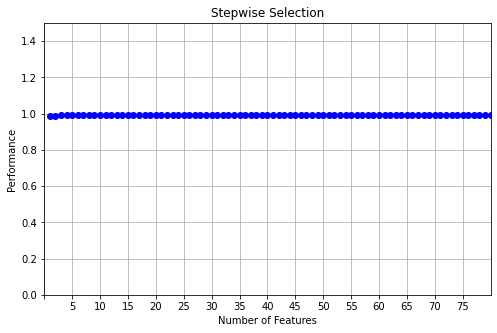

In [60]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
fig1 = plot_sfs(sfs.get_metric_dict(),kind='std_dev',figsize=(8,5))
plt.xticks(np.arange(0,len(mydata80.columns), step=5))
plt.ylim([0,1.5])
plt.xlim(0, len(mydata80.columns))
plt.title('Stepwise Selection')
plt.grid()
# plt.savefig('FS_fdr.png')
plt.show()